<a href="https://colab.research.google.com/github/Ash100/Documents/blob/main/Ms_Hameeda_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is designed and managed by **Dr. Ashfaq Ahmad**. It reads the **_.xvg_** file generated by Gromacs for PCA, and offers different plotting options. Please let me know, if you want certain changes in it.

In [1]:
# --- Step 1: Install required libraries (only once per session) ---
!pip install pandas matplotlib seaborn --quiet

✅ Loaded 476 points


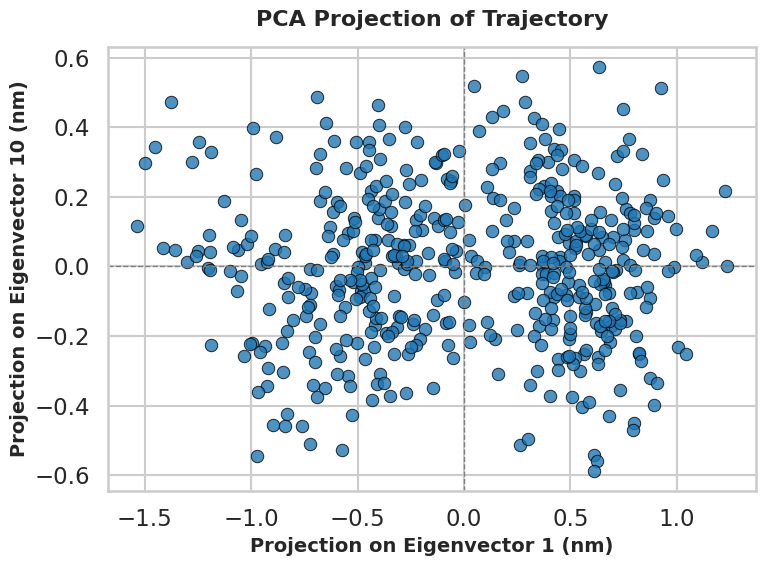

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/2d C240D Protein.xvg"  # Change if needed

# --- Step 1: Read file safely ---
data = []
with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#") or line.startswith("@"):
            continue
        try:
            parts = line.split()
            if len(parts) >= 2:  # Ensure at least two numeric values
                x, y = float(parts[0]), float(parts[1])
                data.append([x, y])
        except ValueError:
            continue  # skip lines with non-numeric content

pca_df = pd.DataFrame(data, columns=["PC1", "PC10"])
print(f"✅ Loaded {len(pca_df)} points")

# --- Step 2: Professional PCA Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", context="talk")

sns.scatterplot(data=pca_df, x="PC1", y="PC10",
                s=80, color="#1f77b4", edgecolor="black", alpha=0.8)

plt.xlabel("Projection on Eigenvector 1 (nm)", fontsize=14, fontweight="bold")
plt.ylabel("Projection on Eigenvector 10 (nm)", fontsize=14, fontweight="bold")
plt.title("PCA Projection of Trajectory", fontsize=16, fontweight="bold", pad=15)

plt.axhline(0, color="gray", lw=1, linestyle="--")
plt.axvline(0, color="gray", lw=1, linestyle="--")
plt.tight_layout()

plt.savefig("PCA_projection.png", dpi=800, bbox_inches="tight")
plt.show()


✅ Loaded 476 PCA points


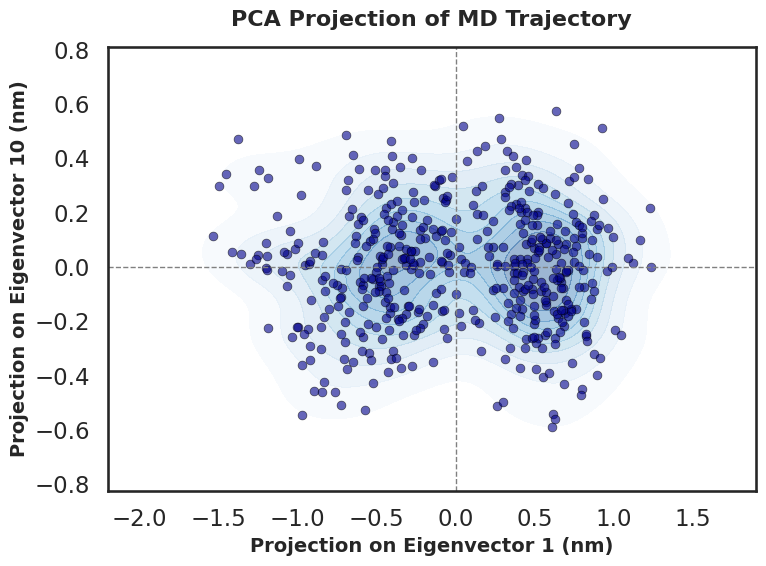

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/2d C240D Protein.xvg"  # <- Replace with your uploaded file path

# --- Step 2: Read PCA data safely ---
data = []
with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#") or line.startswith("@"):
            continue
        try:
            parts = line.split()
            if len(parts) >= 2:
                x, y = float(parts[0]), float(parts[1])
                data.append([x, y])
        except ValueError:
            continue

pca_df = pd.DataFrame(data, columns=["PC1", "PC10"])
print(f"✅ Loaded {len(pca_df)} PCA points")

# --- Step 3: Professional PCA plot ---
sns.set_theme(style="white", context="talk")

plt.figure(figsize=(8, 6))

# Plot KDE density contours
sns.kdeplot(data=pca_df, x="PC1", y="PC10",
            fill=True, cmap="Blues", thresh=0.05, alpha=0.4)

# Overlay scatter points
sns.scatterplot(data=pca_df, x="PC1", y="PC10",
                s=40, color="darkblue", edgecolor="black", alpha=0.6)

# Formatting
plt.axhline(0, color="gray", lw=1, linestyle="--")
plt.axvline(0, color="gray", lw=1, linestyle="--")
plt.xlabel("Projection on Eigenvector 1 (nm)", fontsize=14, fontweight="bold")
plt.ylabel("Projection on Eigenvector 10 (nm)", fontsize=14, fontweight="bold")
plt.title("PCA Projection of MD Trajectory", fontsize=16, fontweight="bold", pad=15)
plt.tight_layout()

# --- Step 4: Save high-resolution figure ---
plt.savefig("1_PCA_projection_pro.png", dpi=800, bbox_inches="tight")
plt.show()


✅ Loaded 476 PCA points


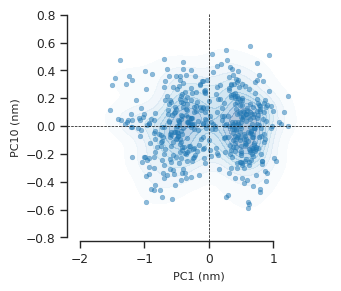

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# --- Step 2: Read PCA data safely ---
file_path = "/content/2d C240D Protein.xvg"  # <- Replace with your uploaded file

data = []
with open(file_path, "r") as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("#") or line.startswith("@"):
            continue
        try:
            parts = line.split()
            if len(parts) >= 2:
                x, y = float(parts[0]), float(parts[1])
                data.append([x, y])
        except ValueError:
            continue

pca_df = pd.DataFrame(data, columns=["PC1", "PC10"])
print(f"✅ Loaded {len(pca_df)} PCA points")

# --- Step 3: Nature-style formatting ---
# Nature uses Helvetica / Arial style fonts and clear, minimalist plots
sns.set_theme(style="ticks", context="paper")
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Arial"]

plt.figure(figsize=(3.5, 3.0))  # Nature prefers small panels (single-column width)

# Plot KDE density (subtle, not overpowering)
sns.kdeplot(data=pca_df, x="PC1", y="PC10",
            fill=True, cmap="Blues", thresh=0.05, alpha=0.3, levels=10)

# Overlay scatter points with reduced size and alpha
sns.scatterplot(data=pca_df, x="PC1", y="PC10",
                s=12, color="#1f77b4", edgecolor=None, alpha=0.5)

# Minimal axis and frame
plt.axhline(0, color="black", lw=0.5, linestyle="--")
plt.axvline(0, color="black", lw=0.5, linestyle="--")
plt.xlabel("PC1 (nm)", fontsize=8)
plt.ylabel("PC10 (nm)", fontsize=8)

# Remove top/right spines for Nature style
sns.despine(trim=True)

# Tight layout and save
plt.tight_layout()
plt.savefig("PCA_projection_NatureStyle.png", dpi=800, bbox_inches="tight")
plt.show()
